In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', False)
import seaborn as sns
sns.set_style("white")

## LLN Applied to Simulation
In the last notebook we mentioned that the percentage of simulation runs meeting a certain criteria can be cast as computing a running expectation and thus subject to the Law of Large Numbers, and gave the mathematical argument for convergence.

Here, we'll poke at practical issues like how large n needs to be before the LLN has taken hold. We'll be happy to learn that the situation in Monte Carlo is one of the best-behaved cases for the LLN and that we can more or less trust that a faithful Monte Carlo experiment will close in on the true probability pretty rapidly.

## LLN Restated
If we restrict the LLN to looking at the running average of a series of independent draws from THE SAME distribution, it can be stated very simply: 

"The average of the sample will converge to the expected value of the distribution". 

Ergo, if you'd like to know the expected value of some distribution/random variable, a) try to just do the expectation math b) if you can't you could instead draw samples from the given distribution and average the samples. The average you get from that sample will be pretty close to correct if you drew enough samples.

## Simulating For A Probability
We happen to choose flipping a coin as our model to simulate, but ANY probability simulation experiment is just glorified coin flipping: at the end of the day, a simulation either did (heads) or didn't (tails) count towards the running total.

Here we will use the function `np.random.choice`, which will pick an item from a list (optionally giving some items a greater chance of being picked)

In [2]:
np.random.seed(10)
def flip_n_times(N, b=0.5, verbose=True):
    #choose heads or tails N times.
    results = np.random.choice(['H','T'], size=N, p=[b,1-b])
    total_heads  = np.sum(results=='H')
    
    #print results
    if verbose:
        print("Number of Heads/Total Throws:", total_heads/N)
    
    return results

In [3]:
_=flip_n_times(100, .217)

Number of Heads/Total Throws: 0.19


Notice that you do not necessarily get 55.5% heads.

#### Simulation Error
But suppose that we run same process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time?

In [4]:
_=flip_n_times(100, .217)

Number of Heads/Total Throws: 0.28


That's a little worrying: the two replications gave rather different results; we might not want to trust either one of them. (And we actually know that both of them are wrong).

What does the range of results look like at this number of flips?

In [5]:
for rep in range(10):
    _=flip_n_times(100, .217)

Number of Heads/Total Throws: 0.2
Number of Heads/Total Throws: 0.28
Number of Heads/Total Throws: 0.18
Number of Heads/Total Throws: 0.3
Number of Heads/Total Throws: 0.25
Number of Heads/Total Throws: 0.13
Number of Heads/Total Throws: 0.18
Number of Heads/Total Throws: 0.27
Number of Heads/Total Throws: 0.21
Number of Heads/Total Throws: 0.26


Results seem to bounce around a lot. There seems to be an error of about +/- 0.1, and we don't really have a good idea what the true probability might be.

#### Reducing Simulation Error
The results should bounce around less if we perform more flips before stopping. What if we quadruple the number of samples?

In [6]:
for rep in range(10):
    _=flip_n_times(400, .217)

Number of Heads/Total Throws: 0.1925
Number of Heads/Total Throws: 0.245
Number of Heads/Total Throws: 0.2375
Number of Heads/Total Throws: 0.25
Number of Heads/Total Throws: 0.26
Number of Heads/Total Throws: 0.235
Number of Heads/Total Throws: 0.215
Number of Heads/Total Throws: 0.2175
Number of Heads/Total Throws: 0.23
Number of Heads/Total Throws: 0.2075


Better. The error is maybe around 0.5, roughly half of what it was, and the first digit is more or less locked in.

Let's quadruple again!

In [7]:
for rep in range(10):
    _=flip_n_times(400*4, .217)

Number of Heads/Total Throws: 0.24
Number of Heads/Total Throws: 0.241875
Number of Heads/Total Throws: 0.20375
Number of Heads/Total Throws: 0.239375
Number of Heads/Total Throws: 0.2225
Number of Heads/Total Throws: 0.210625
Number of Heads/Total Throws: 0.230625
Number of Heads/Total Throws: 0.234375
Number of Heads/Total Throws: 0.211875
Number of Heads/Total Throws: 0.22


The error is now down to something like 0.25, and we're starting to get a good picture.

Let's go BIIIIG:

In [8]:
for rep in range(10):
    _=flip_n_times(1000000, .217)

Number of Heads/Total Throws: 0.216787
Number of Heads/Total Throws: 0.216937
Number of Heads/Total Throws: 0.217123
Number of Heads/Total Throws: 0.217324
Number of Heads/Total Throws: 0.217026
Number of Heads/Total Throws: 0.217349
Number of Heads/Total Throws: 0.216434
Number of Heads/Total Throws: 0.217264
Number of Heads/Total Throws: 0.216985
Number of Heads/Total Throws: 0.217113


Those results are very consistent and accurate. It looks like we've got three decimal places figured out. 

As a note, spending your simuation budget on 10 separate runs isn't cost effective. Even if you average the 10 length-n runs, it's identical to just doing one run of length 10n, so you might as well do the single run in the first place.

### Visualizing convergence
Let's chart 10 different people's coin-flipping experience.

In [9]:
total_flips=10000
n_replications=10

def plot_history(total_flips,n_replications,normed=True):

    for rep in range(n_replications):
        random_flips = flip_n_times(total_flips, .217, verbose=False)

        #cumsum is a nice numpy function for "the total so far"
        running_sum = np.cumsum(random_flips=="H")

        #holds the denominator at each index
        sequence_lengths = np.array(range(1,total_flips+1))
        
        if normed:
            #divide to get the overall mean
            running_means = running_sum / sequence_lengths
        else:
            #just misnomer the totals
            running_means = running_sum
        #running_means = running_sum / sequence_lengths
        plt.plot(sequence_lengths, running_means)
    plt.xlabel("Number of flips")
    if normed:
        plt.ylabel("Average Number of Heads")
    else:
        plt.ylabel("Total Number of Heads")
    plt.show()

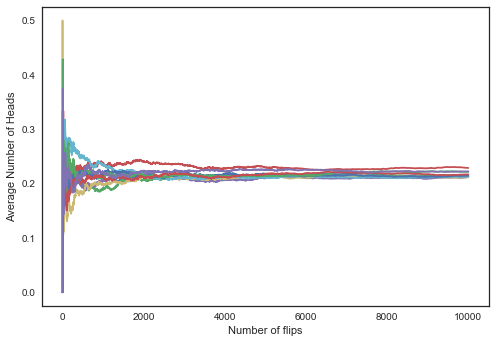

In [10]:
plot_history(total_flips,n_replications,normed=True)

Again, we see that there's lots of varaince early, but with larger sample size any particular result is close to the other results and the true mean.

## Simulating for a Number
Suppose that we're not trying to something like "probability the coin is heads" or "probability three of a kind is a winning hand", suppose we want to simulate to find "the likely return on a stock after one week" or "The temperature at noon tomorrow". 

There are two approaches to dicussing "the temperature at noon tomorrow":  
a) The temperature is random and could be any number of things; find the distribution
b) Nuts to that, just tell me your best guess, like the weatherman does.

We'll discuss a) in a bit since it moves beyond the LLN. For b) we've got to distill the distribution in a) down to a single number. If we decide that the best distillation is the mean of the distribution, the LLN will give us a handy way of finding that mean: get a sample and average it. With a big sample, the average in the sample will be close to the true expectation.

(We could pick other distribution summaries like the median. Sample medians happen to aproximate true medians, but the LLN only talks about sample and true _expectations_. The LLN is still wide-reaching, though: because variances are expectations, LLN also states that sample varainces converge to the true variance, and likewise for any summary that's the weighted average of some score function at each point in the distribution. Medians just happen to dodge that class.)

### Example
Just to invent something to simulate, suppose that the weather operates by taking today's temperature (70 degrees) and multiplying it by a draw from $normal(1,.2)$ five separate times to give tomorrow's temperature. [This is obviously not true]

What should we guess tomorrow's temparature to be (taking the mean of the possible temperatures as a good guess)?

Run 0 final mean: 70.11683875619201
Run 1 final mean: 70.21399467635918
Run 2 final mean: 70.25951394335614
Run 3 final mean: 69.5668794679003
Run 4 final mean: 69.83450279289869
Run 5 final mean: 69.75936882192171
Run 6 final mean: 70.12061179833889
Run 7 final mean: 69.7803698092978
Run 8 final mean: 70.00321648707664
Run 9 final mean: 69.23554110218586


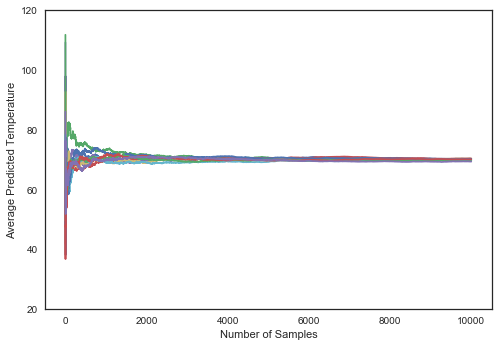

In [11]:
total_samples=10000
n_replications=10

#this could/should be done without the loop via an array of size 
#n_replications by total_samples, but it's clearer and more consistent 
#this way
for rep in range(n_replications):
    
    #today's temperature is 70 degrees, and we have total_samples different
    #possible futures
    todays_temp=np.full(total_samples, 70, dtype=int)
    
    #in each trial, multiply the current temp by a draw from a normal dist
    #five times
    for _ in range(5):
        todays_temp= todays_temp*np.random.normal(1,.25,size=total_samples)

    #post-hoc figue out what we'd have seen if we stopped collecting data
    #at the nth trial instead of going all the way to 10,000
    running_sum = np.cumsum(todays_temp)

    #holds the denominator at each index
    sequence_lengths = np.array(range(1,total_samples+1))
    running_means = running_sum / sequence_lengths
    
    #print and plot
    print("Run {} final mean: {}".format(rep,running_means[-1]))
    plt.plot(sequence_lengths, running_means)

plt.ylim(20,120)
plt.ylabel("Average Predicted Temperature")
plt.xlabel("Number of Samples")
plt.show()

Again, we see the LLN's pattern: variable at first, but all results closing in on the true value later. Note that we didn't know that the average of the distribution of possible temperature would be close to 70 degrees: we might have thought that the normal distribution would occaionally produce values close to zero and thus pull down the prediction permanently. We _learned_ from this simulation.

### Rare events 
One important possibility occurs when simulation results are real numbers instead of probabilites: black swans. A black swan event is a rare event that carries an outsized impact on the quantity of interest. They are impossible in probability simulations becuase the outcome is always either one (event of interest occured) or zero (event did not occur): neither one has an outsized impact.

If we're calculating an expectation and the score function goes wild at rare places, we'd better watch out: those rare, big events can really make our running average jump around and it'll take longer for the simulation average to converge to the true epectation. Equivalently, if a particular distribution has a large variance, it will take longer for the simulation to converge.

An extreme case is the Cauchy distribution, which can spit out really, really big values relatively often. It's so bad that 1) the distribution's variance is infinite 2) the integral to find the distribution's mean doesn't even converge 3) the running sample means never converge.

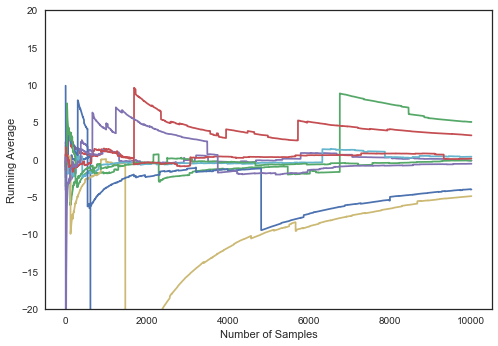

In [12]:
total_samples=10000
n_replications=10

#this could/should be done without the loop via an array of size 
#n_replications by total_samples, but it's clearer and more consistent 
#this way
for rep in range(n_replications):
    
    #today's temperature is 70 degrees, and we have total_samples different
    #possible futures
    draws = np.random.standard_cauchy(total_samples)
    #post-hoc figue out what we'd have seen if we stopped collecting data
    #at the nth trial instead of going all the way to 10,000
    running_sum = np.cumsum(draws)

    #holds the denominator at each index
    sequence_lengths = np.array(range(1,total_samples+1))
    running_means = running_sum / sequence_lengths
    
    #plot
    plt.plot(sequence_lengths, running_means)

plt.ylim(-20,20)
plt.ylabel("Running Average")
plt.xlabel("Number of Samples")
plt.show()

The Cauchy distribution frequently produces values so big that they swamp the running average. For some distributions, these events are rare enough or small enough that with enough samples the running average will still converge. In the case of the Cauchy the distrbances are so big the running average will never settle down: the LLN fails to hold because Cauchy violates its conditions.

## Simulating for a Distribution
The LLN does not directly apply to estimating/approximating a distribution; the LLN only says that our sample average should look like the actual expectation we'd get from doing all the math. To assure ourselves that the distribution returned by our process won't be too different from the distribution returned by our firend's process, we'd need the Glivenko-Cantelli theorem.

In general, approximating a distribution well is much harder than approximating some expected value under that distribution, and requires many more samples. This stands to reason: given the distribution one could post-hoc calculate any expectation or other derived feature. It's much harder to be right for any possible post-processing than for one particular post-processing.